In [ ]:
import pandas as pd
import numpy as np
import requests
from dateutil import parser

In [ ]:
!pip install python-dateutil

In [ ]:
sta = ["85700MS","86600MS","86900MS","78305MS","78110MS","74200MS", "78480SF", "78305MS"]
n_sta = len(sta)
ls = [0]*2*n_sta
for i in range(n_sta):
  ls[i*2]="http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code={}&sensor_code=LT&date_from=20160214&date_to=20230719".format(sta[i])
  ls[i*2+1]="http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code={}&sensor_code=LF&date_from=20160214&date_to=20230719".format(sta[i])


In [ ]:
print(ls)

['http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=85700MS&sensor_code=LT&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=85700MS&sensor_code=LF&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=86600MS&sensor_code=LT&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=86600MS&sensor_code=LF&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=86900MS&sensor_code=LT&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=86900MS&sensor_code=LF&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/timeseries?station_code=78305MS&sensor_code=LT&date_from=20160214&date_to=20230719', 'http://daten.buergernetz.bz.it/services/meteo/v1/time

In [ ]:
print("Numero di stazioni:", int(len(ls)/2))

Numero di stazioni: 8


In [ ]:
sys_size = len(ls)
sps = 2
def download_file(url):
    response = requests.get(url)
    df = pd.DataFrame(response.json())
    return(df)

df_list = []

for idx, url in enumerate(ls):
    filename = f"file{idx+1}.txt"  # Generate a filename based on the index
    df_list.append(download_file(url))

df = pd.DataFrame(df_list[0]["DATE"])

for i in range(sys_size):
  df  = pd.merge(df,
         df_list[i],
         how='inner',
         on='DATE',
         suffixes=('_LT_{}'.format(int(i/sps)), '_LF_{}'.format(int(i/sps))),

      )

In [ ]:
df['DATE'] = df['DATE'].apply(lambda x: parser.parse(x))

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%dT%H:%M:%S%Z')

In [ ]:
df

,DATE,VALUE_LT_0,VALUE_LF_0,VALUE_LT_1,VALUE_LF_1,VALUE_LT_2,VALUE_LF_2,VALUE_LT_3,VALUE_LF_3,VALUE_LT_4,VALUE_LF_4,VALUE_LT_5,VALUE_LF_5,VALUE_LT_6,VALUE_LF_6,VALUE_LT_7,VALUE_LF_7
0,2023-07-19 00:00:00,19.4,95.1,19.8,94.2,20.8,81.7,13.9,99.9,13.0,88.6,13.1,73.7,16.0,71.6,13.9,99.9
1,2023-07-18 23:50:00,19.5,95.5,19.8,94.6,21.3,77.6,14.0,99.9,13.2,87.2,12.8,74.6,16.4,67.4,14.0,99.9
2,2023-07-18 23:40:00,19.5,95.1,19.6,95.4,21.6,72.8,14.1,99.9,12.7,91.8,12.7,77.8,16.3,67.5,14.1,99.9
3,2023-07-18 23:30:00,19.7,94.1,19.4,94.8,20.9,80.7,14.2,99.7,12.5,94.2,13.1,74.1,16.0,71.0,14.2,99.7
4,2023-07-18 23:20:00,19.9,92.4,19.3,95.8,20.5,82.9,14.3,99.0,12.5,94.4,13.7,68.2,15.4,75.8,14.3,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110811,2021-06-08 07:10:00,16.2,100.3,16.5,100.0,16.4,99.9,11.5,97.6,9.8,76.1,8.1,81.7,7.6,78.9,11.5,97.6
110812,2021-06-08 07:00:00,16.1,100.3,16.3,100.0,16.3,99.9,11.3,98.6,9.5,79.2,7.9,79.9,7.4,78.2,11.3,98.6
110813,2021-06-08 06:50:00,15.8,100.3,16.1,99.9,16.2,99.9,11.1,98.7,9.3,80.9,7.7,80.3,7.3,78.3,11.1,98.7
110814,2021-06-08 06:40:00,15.8,100.3,16.1,100.0,16.0,99.9,11.1,98.6,9.3,80.0,7.7,79.6,7.1,79.5,11.1,98.6


In [ ]:
import sys
sys.getsizeof(df)

15957520

<ipython-input-80-7ee1d099c263>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=45, fontsize=8)


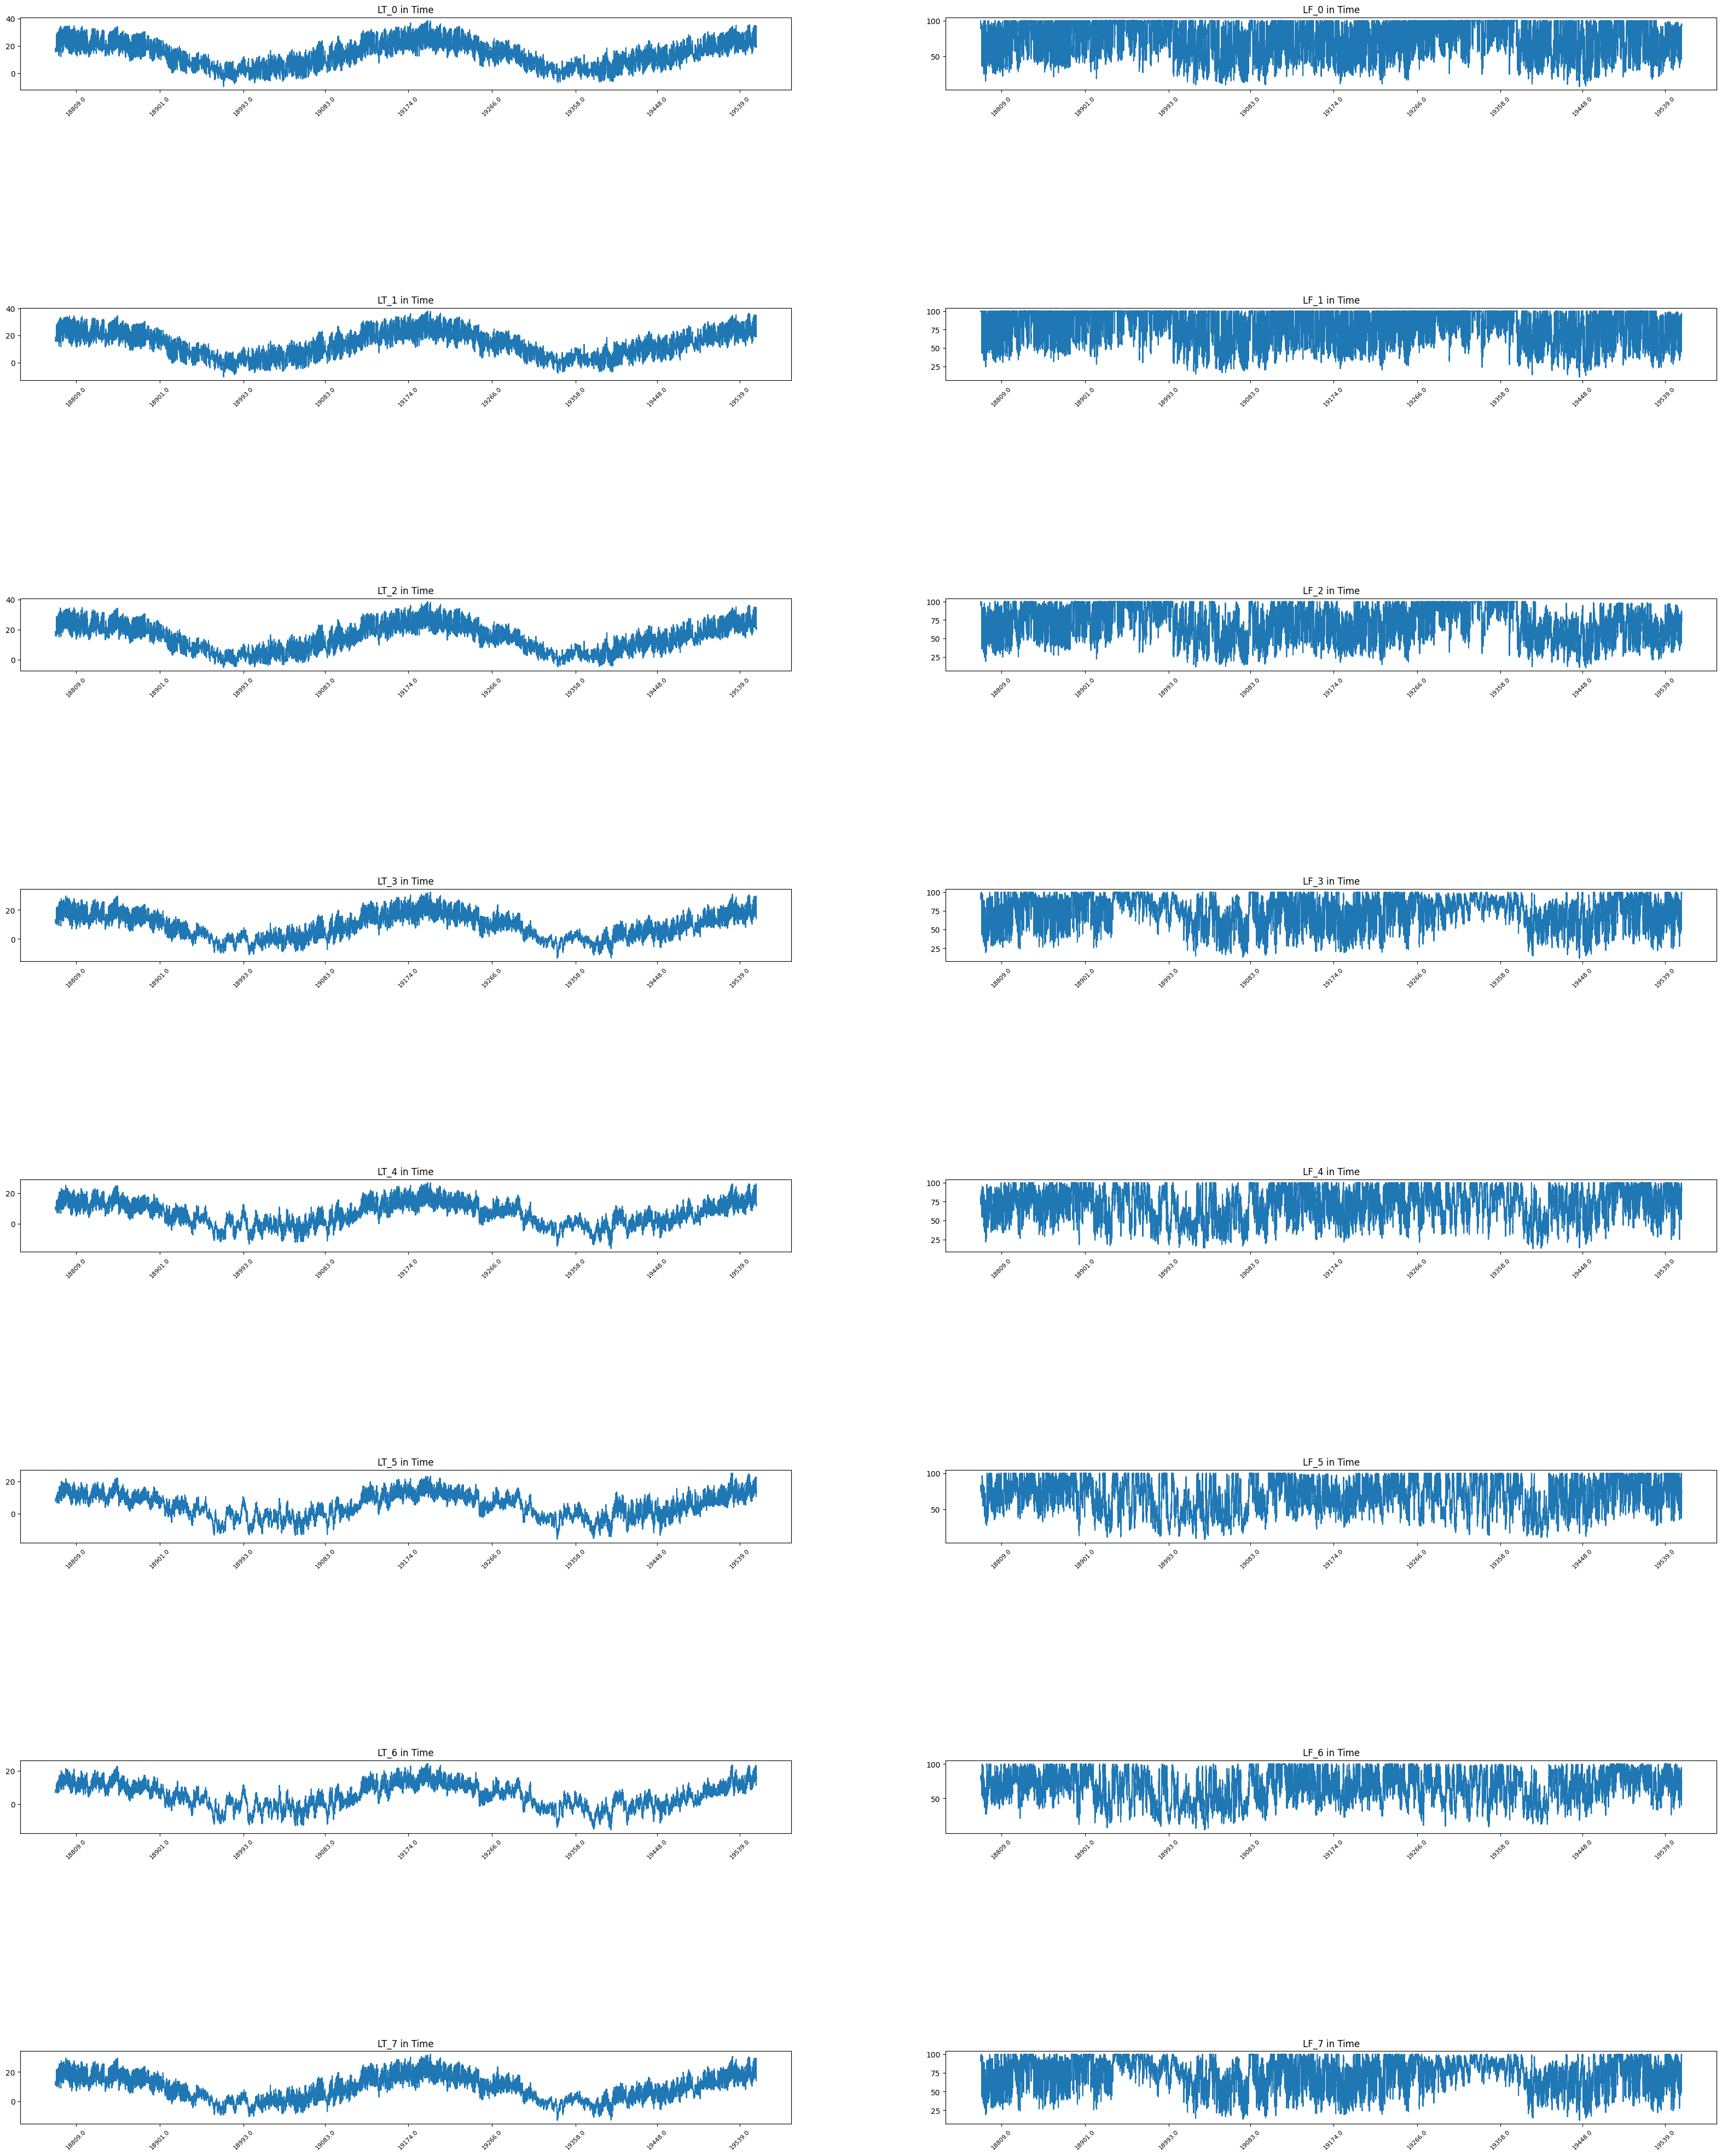

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(int(sys_size/sps),2,figsize=(40,50), gridspec_kw={'hspace':3})


for i in range (int(sys_size/sps)):

  ax[i,0].plot(df['DATE'], df["VALUE_LT_{}".format(i)])
  ax[i,0].set_title("LT_{} in Time".format(i))
  ax[i,1].plot(df['DATE'], df["VALUE_LF_{}".format(i)])
  ax[i,1].set_title("LF_{} in Time".format(i))

for axes_row in ax:
    for axes in axes_row:
        axes.set_xticklabels(axes.get_xticks(), rotation=45, fontsize=8)

plt.show()

Controlliamo la percentuale di Nan.

In [ ]:
column_list = df.columns.tolist()
nan_percentage = []
for column in column_list:
    nan_percentage.append(df[column].isna().mean() * 100)

In [ ]:
print(nan_percentage)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Sembra che alla provincia di Bolzano lavorino molto bene. LOL

In [ ]:
def get_weight(arr1,arr2):
    distanza = np.linalg.norm(arr1 - arr2)
    return distanza

In [ ]:
distanza = []
for i in range(len(column)):
    distanza.append(get_weight(df[column[i]], df[column[i+2]]))

KeyError: ignored

In [ ]:
distanza = np.linalg.norm(df['VALUE_LT_0'].values - df['T4'].values)

In [ ]:
print(distanza)

86.55737981246894


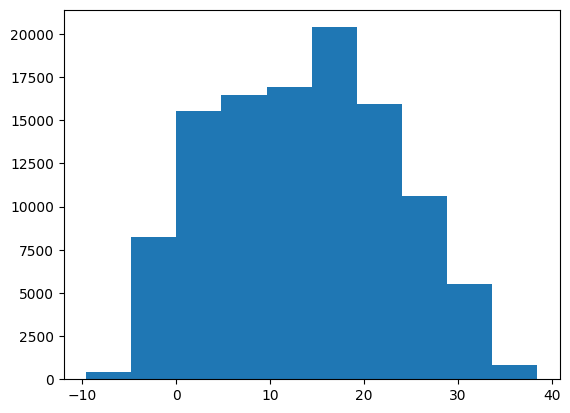

In [147]:
plt.hist(df["VALUE_LT_0"], bins=)
plt.show()

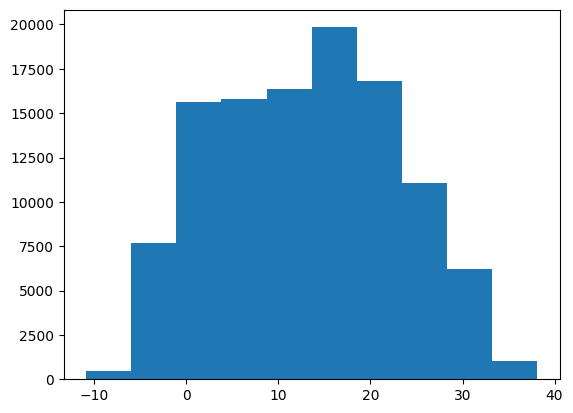

In [148]:
plt.hist(df["VALUE_LT_1"])
plt.show()

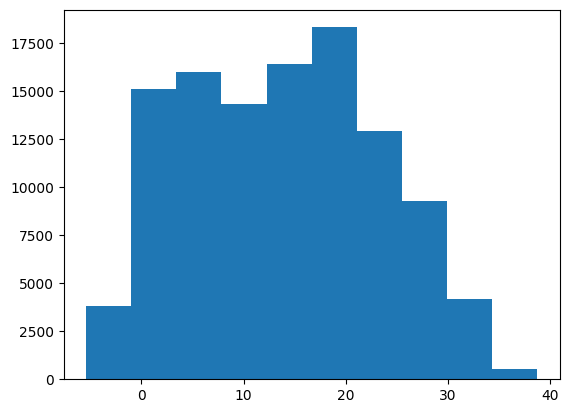

In [149]:
plt.hist(df["VALUE_LT_2"])
plt.show()

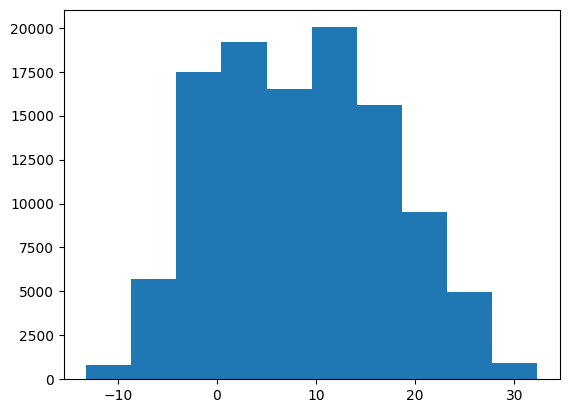

In [150]:
plt.hist(df["VALUE_LT_3"])
plt.show()

In [152]:
df.corr()

<ipython-input-152-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,VALUE_LT_0,VALUE_LF_0,VALUE_LT_1,VALUE_LF_1,VALUE_LT_2,VALUE_LF_2,VALUE_LT_3,VALUE_LF_3,VALUE_LT_4,VALUE_LF_4,VALUE_LT_5,VALUE_LF_5,VALUE_LT_6,VALUE_LF_6,VALUE_LT_7,VALUE_LF_7
VALUE_LT_0,1.000000,-0.516065,0.993866,-0.472021,0.985865,-0.453462,0.963977,-0.369859,0.913217,-0.056293,0.871387,0.071894,0.850480,0.170217,0.963977,-0.369859
VALUE_LF_0,-0.516065,1.000000,-0.506094,0.956428,-0.457510,0.902645,-0.378828,0.783640,-0.301232,0.554377,-0.225803,0.377254,-0.193220,0.280554,-0.378828,0.783640
VALUE_LT_1,0.993866,-0.506094,1.000000,-0.483432,0.979816,-0.444219,0.959870,-0.358612,0.907259,-0.038983,0.862957,0.092460,0.840307,0.192565,0.959870,-0.358612
VALUE_LF_1,-0.472021,0.956428,-0.483432,1.000000,-0.415501,0.877709,-0.341917,0.771597,-0.262063,0.531816,-0.188253,0.359065,-0.148781,0.260973,-0.341917,0.771597
VALUE_LT_2,0.985865,-0.457510,0.979816,-0.415501,1.000000,-0.453637,0.961954,-0.338499,0.911464,-0.021932,0.876114,0.095452,0.863742,0.181143,0.961954,-0.338499
VALUE_LF_2,-0.453462,0.902645,-0.444219,0.877709,-0.453637,1.000000,-0.324509,0.768830,-0.235167,0.515259,-0.169181,0.350535,-0.147507,0.280736,-0.324509,0.768830
VALUE_LT_3,0.963977,-0.378828,0.959870,-0.341917,0.961954,-0.324509,1.000000,-0.352426,0.973142,-0.063345,0.942402,0.054462,0.927558,0.143752,1.000000,-0.352426
VALUE_LF_3,-0.369859,0.783640,-0.358612,0.771597,-0.338499,0.768830,-0.352426,1.000000,-0.303557,0.803427,-0.243507,0.639864,-0.218227,0.559585,-0.352426,1.000000
VALUE_LT_4,0.913217,-0.301232,0.907259,-0.262063,0.911464,-0.235167,0.973142,-0.303557,1.000000,-0.123066,0.979309,-0.016082,0.970670,0.063449,0.973142,-0.303557
VALUE_LF_4,-0.056293,0.554377,-0.038983,0.531816,-0.021932,0.515259,-0.063345,0.803427,-0.123066,1.000000,-0.085528,0.873328,-0.077518,0.829731,-0.063345,0.803427
